#### IMPORTACIONES

In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import sys
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pickle

#### Exploracion de datos

- Lectura con os

In [7]:
ruta_datos = r"C:\Users\emili\OneDrive\Documentos\GitHub\Deep-Learning-Emiliano0041\data\processed\train"
archivos = os.listdir(ruta_datos)
len(archivos)

25000

- Separare los gatos con los perros

In [8]:
gatos = [f for f in archivos if f.startswith('cat')]
perros = [f for f in archivos if f.startswith('dog')]

len(gatos), len(perros)

(12500, 12500)

- Visualizamos las primeras 9 fotos de perros

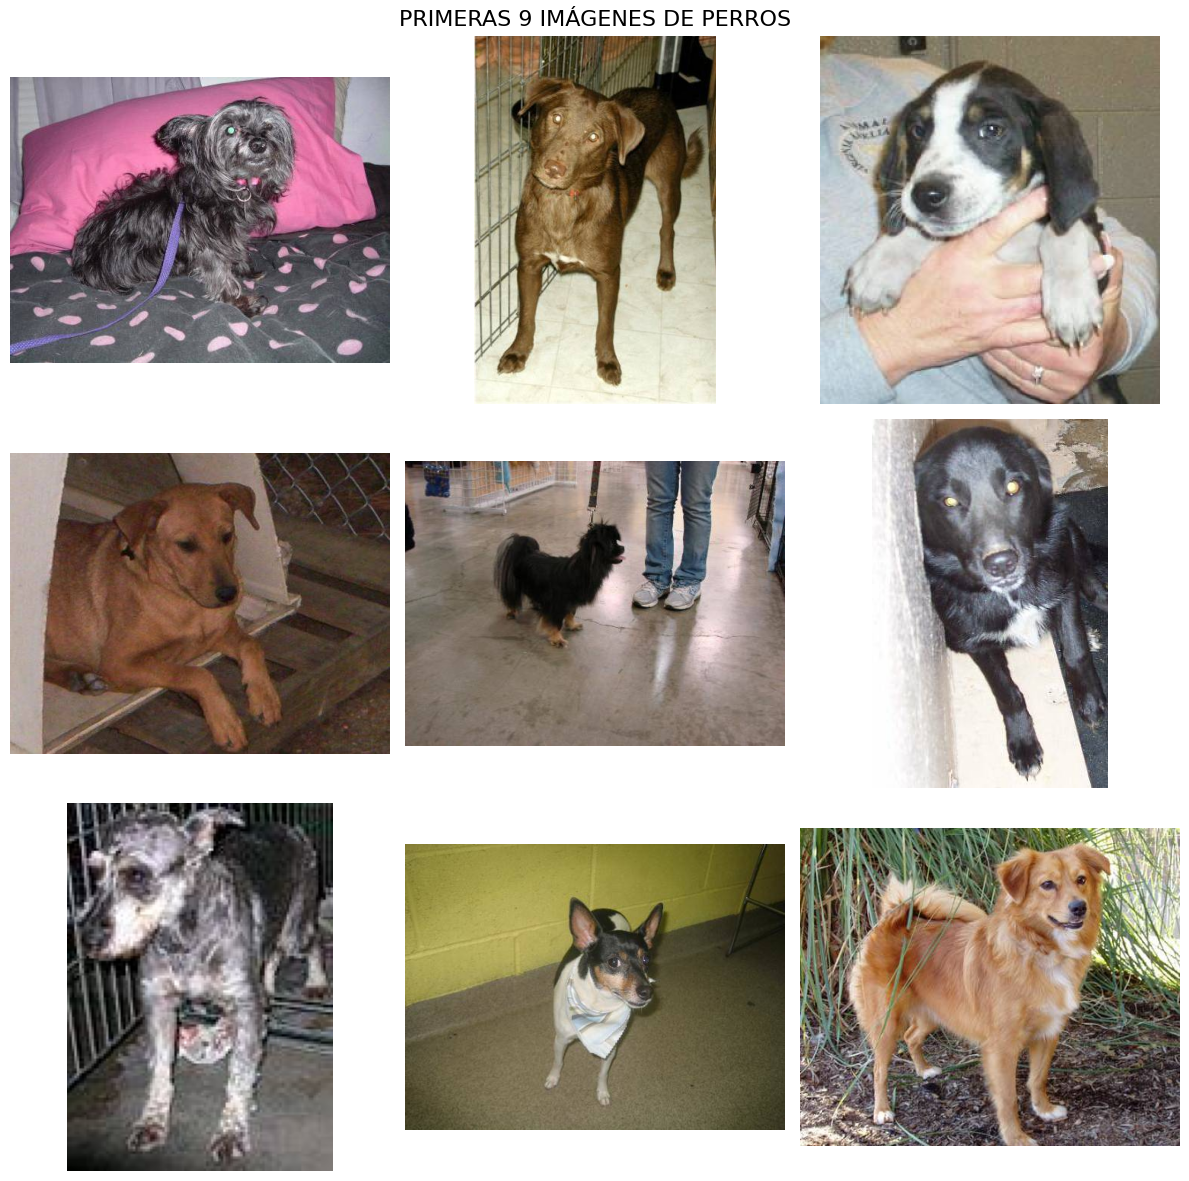

In [9]:

def mostrar_9_imagenes(lista_archivos, carpeta, titulo):
    plt.figure(figsize=(12, 12)) 

    for i in range(9):  
        plt.subplot(3, 3, i+1) 
        
        
        ruta_imagen = os.path.join(carpeta, lista_archivos[i])
        imagen = Image.open(ruta_imagen)
        
        plt.imshow(imagen)
        
        plt.axis('off')
    
    plt.suptitle(titulo, fontsize=16)
    plt.tight_layout()
    plt.show()


mostrar_9_imagenes(perros, ruta_datos, "PRIMERAS 9 IMÁGENES DE PERROS")

- Ahora visualizaremos la de los gatos

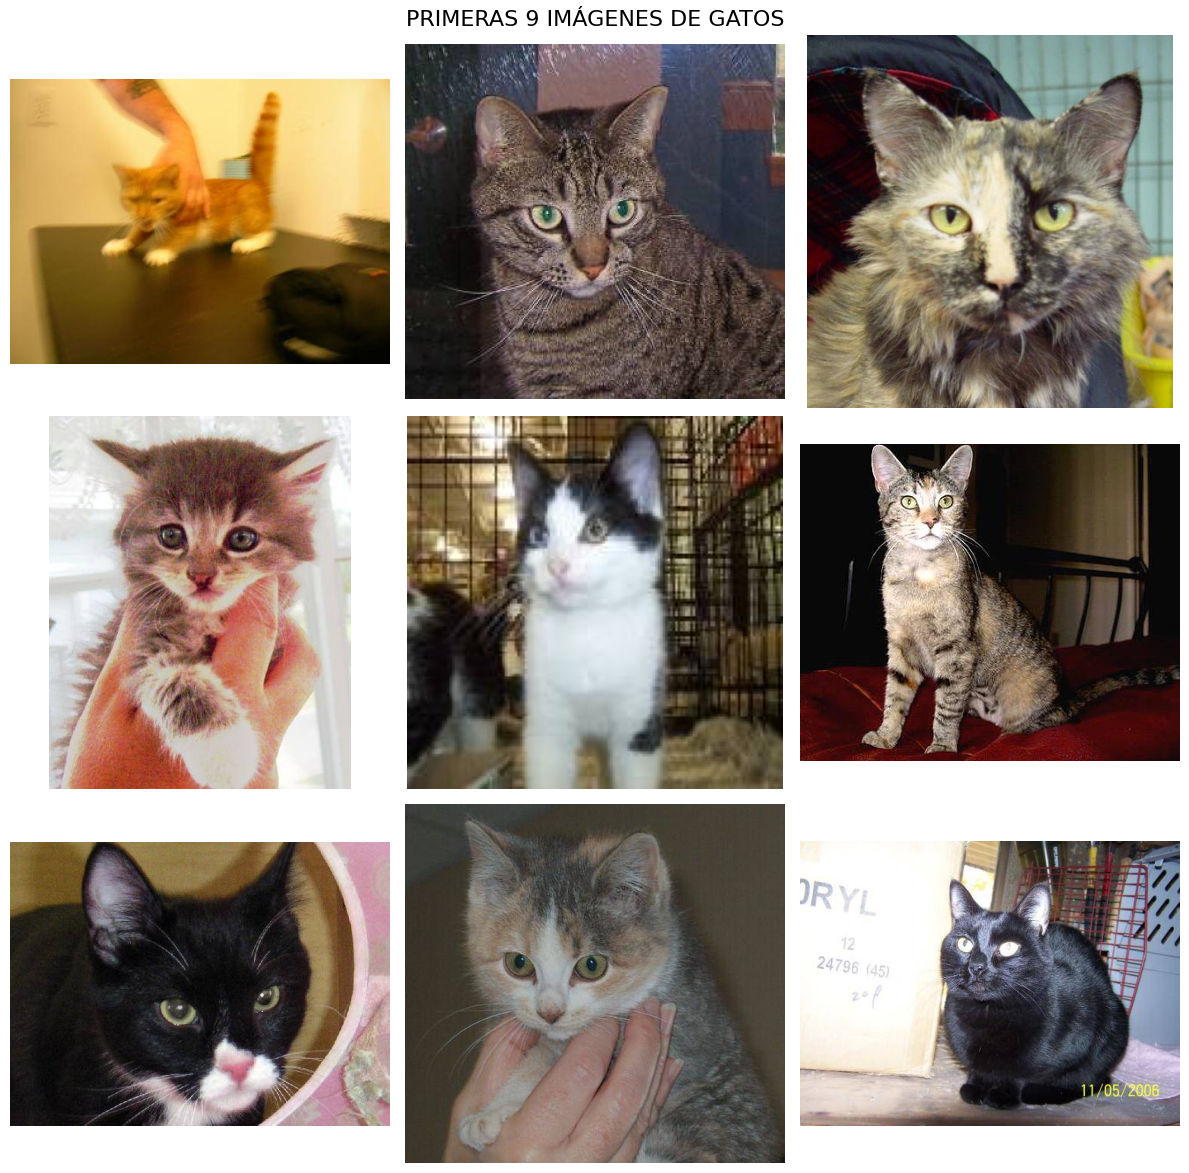

In [10]:
mostrar_9_imagenes(gatos, ruta_datos, "PRIMERAS 9 IMÁGENES DE GATOS")


-------

In [11]:
import psutil

# Verificar RAM del sistema
ram_gb = psutil.virtual_memory().total / (1024**3)
print(f"RAM total del sistema: {ram_gb:.1f} GB")
print(f"RAM disponible actual: {psutil.virtual_memory().available / (1024**3):.1f} GB")

if ram_gb >= 12:
    print("✅ Tienes suficiente RAM - Usaremos OPCIÓN 1 (carga completa)")
else:
    print("⚠️ RAM limitada - Usaremos OPCIÓN 2 (ImageDataGenerator)")

RAM total del sistema: 13.8 GB
RAM disponible actual: 2.7 GB
✅ Tienes suficiente RAM - Usaremos OPCIÓN 1 (carga completa)


- Crearemos carpetas organizadas para poder trabajar con IMAGE GENERATOR

In [12]:
carpeta_principal = "dataset_organizado"
os.makedirs(carpeta_principal, exist_ok=True)

# Cree dos carpetas: "train" y "test"  
carpeta_train = os.path.join(carpeta_principal, "train")
carpeta_test = os.path.join(carpeta_principal, "test")

os.makedirs(carpeta_train, exist_ok=True)
os.makedirs(carpeta_test, exist_ok=True)

# Dentro de train y test, cree carpetas para "cats" y "dogs"
os.makedirs(os.path.join(carpeta_train, "cats"), exist_ok=True)
os.makedirs(os.path.join(carpeta_train, "dogs"), exist_ok=True)
os.makedirs(os.path.join(carpeta_test, "cats"), exist_ok=True)
os.makedirs(os.path.join(carpeta_test, "dogs"), exist_ok=True)


- Separamos en train y test

In [13]:
total_gatos = len(gatos)
total_perros = len(perros)


gatos_para_entrenar = int(total_gatos * 0.8)  
perros_para_entrenar = int(total_perros * 0.8)

#### Organizacion de archivos en carpetas

- Separacion de gatos en train y test, y creacion de carpetas "Train" y "Test"

In [16]:
# Copiar los primeros gatos a la carpeta de entrenamiento
for i in range(gatos_para_entrenar):
    archivo_gato = gatos[i]  # Tomar un gato
    
    # De dónde viene el archivo
    desde = os.path.join(ruta_datos, archivo_gato)
    
    # A dónde va el archivo
    hacia = os.path.join(carpeta_train, "cats", archivo_gato)
    
    # Copiar el archivo
    shutil.copy2(desde, hacia)

print(f"Copié {gatos_para_entrenar} gatos para train")

# Copiar el resto de gatos a la carpeta de prueba
gatos_copiados = 0
for i in range(gatos_para_entrenar, total_gatos):
    archivo_gato = gatos[i]
    
    desde = os.path.join(ruta_datos, archivo_gato)
    hacia = os.path.join(carpeta_test, "cats", archivo_gato)
    
    shutil.copy2(desde, hacia)
    gatos_copiados += 1

print(f"Copié {gatos_copiados} gatos para test")

Copié 10000 gatos para train
Copié 2500 gatos para test


- Separacion de perros en train y test, y creacion de carpetas "Train" y "Test"

In [17]:
# Copiar los primeros perros a la carpeta de entrenamiento
for i in range(perros_para_entrenar):
    archivo_perro = perros[i]  # Tomar un perro
    
    # De dónde viene el archivo
    desde = os.path.join(ruta_datos, archivo_perro)
    
    # A dónde va el archivo
    hacia = os.path.join(carpeta_train, "dogs", archivo_perro)
    
    # Copiar el archivo
    shutil.copy2(desde, hacia)

print(f"Copié {perros_para_entrenar} perros para train")

# Copiar el resto de perros a la carpeta de prueba
perros_copiados = 0
for i in range(perros_para_entrenar, total_perros):
    archivo_perro = perros[i]
    
    desde = os.path.join(ruta_datos, archivo_perro)
    hacia = os.path.join(carpeta_test, "dogs", archivo_perro)
    
    shutil.copy2(desde, hacia)
    perros_copiados += 1

print(f"Copié {perros_copiados} perros para test")


Copié 10000 perros para train
Copié 2500 perros para test


- Conectamos el organizador con las imagenes


In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)

# Conectar el organizador con la carpeta de entrenamiento
trdata = train_datagen.flow_from_directory(
    "dataset_organizado/train",      # Carpeta donde están mis gatos y perros para entrenar
    target_size=(200, 200),          # Cambiar TODAS las fotos a 200x200
    batch_size=32,                   # Procesar 32 fotos a la vez
    class_mode='binary'              # Solo 2 clases: gato=0, perro=1
)

trdata.samples

Found 20000 images belonging to 2 classes.


20000

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Conectar con la carpeta de prueba
tsdata = test_datagen.flow_from_directory(
    "dataset_organizado/test",       # Carpeta de prueba
    target_size=(200, 200),          # También 200x200
    batch_size=32,
    class_mode='binary'
)

tsdata.samples

Found 5000 images belonging to 2 classes.


5000

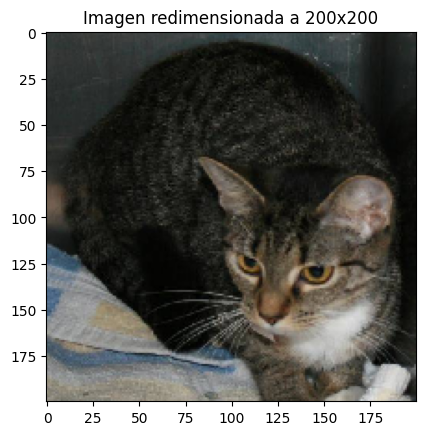

In [29]:
# Tomar un grupito de imágenes procesadas
imagenes, etiquetas = next(trdata)

# Ver cómo quedó una imagen
plt.imshow(imagenes[0])  # La primera imagen del grupo
plt.title("Imagen redimensionada a 200x200")
plt.show()

#### Creacion del modelo

In [32]:
model = Sequential()

# BLOQUE 1: Detectar patrones básicos (líneas, bordes)
model.add(Conv2D(input_shape=(200,200,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# BLOQUE 2: Detectar formas más complejas (ojos, narices)
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# BLOQUE 3: Detectar partes del cuerpo (cabezas, patas)
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# BLOQUE 4: Detectar animales completos
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# BLOQUE 5: Refinar la detección
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# PARTE FINAL: Tomar la decisión
model.add(Flatten())  # Convertir imagen en números
model.add(Dense(units=1024, activation="relu"))  # Neurona pensante 1 (reducí de 4096 a 1024)
model.add(Dense(units=512, activation="relu"))   # Neurona pensante 2 (reducí de 4096 a 512)
model.add(Dense(units=1, activation="sigmoid"))  # Decisión final: ¿Gato(0) o Perro(1)?

print(f"Total de parámetros: {model.count_params():,}")

Total de parámetros: 34,115,393


> TRAIN

In [34]:
model.compile(
    optimizer='adam',          
    loss='binary_crossentropy',
    metrics=['accuracy']        
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,115,393 (130.14 MB)

 Trainable params: 34,115,393 (130.14 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    trdata,                    # Datos de entrenamiento
    steps_per_epoch=50,        # Cuántos "pasos" por cada ronda de aprendizaje
    epochs=10,                  # Cuántas "rondas completas" de aprendizaje
    validation_data=tsdata,    # Datos para verificar si está aprendiendo bien
    validation_steps=25        # Cuántos pasos para verificar
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 542s 11s/step - accuracy: 0.5050 - loss: 0.6935 - val_accuracy: 0.4963 - val_loss: 0.6935
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 546s 11s/step - accuracy: 0.5150 - loss: 0.6929 - val_accuracy: 0.5213 - val_loss: 0.6923
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 627s 13s/step - accuracy: 0.4950 - loss: 0.6936 - val_accuracy: 0.5337 - val_loss: 0.6925
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 549s 11s/step - accuracy: 0.4906 - loss: 0.6933 - val_accuracy: 0.4988 - val_loss: 0.6932
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 562s 11s/step - accuracy: 0.5213 - loss: 0.6929 - val_accuracy: 0.4950 - val_loss: 0.6933
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 531s 11s/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.4950 - val_loss: 0.6934
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 488s 10s/step - accuracy: 0.4731 - loss: 0.6936 - val_accuracy: 0.5100 - val_loss: 0.6931
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 526s 11s/step - accuracy: 0.5288 - loss: 0.6929 - val_accuracy: 0.

KeyboardInterrupt: 

- Probaremos un modelo mas simple, ya que el anterior era muy complejo para los datos que teniamos y no estaba entrenando correctamente

In [ ]:

model_simple = Sequential()


model_simple.add(Conv2D(input_shape=(200,200,3), filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model_simple.add(MaxPooling2D(pool_size=(2,2)))

model_simple.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_simple.add(MaxPooling2D(pool_size=(2,2)))

model_simple.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_simple.add(MaxPooling2D(pool_size=(2,2)))


model_simple.add(Flatten())
model_simple.add(Dense(units=128, activation="relu"))  # Solo 128 neuronas
model_simple.add(Dense(units=1, activation="sigmoid"))

# Compilar con learning rate MÁS BAJO
from tensorflow.keras.optimizers import Adam
model_simple.compile(
    optimizer=Adam(learning_rate=0.0001),  # 10 veces más lento
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo simple creado")
print(f"Parámetros: {model_simple.count_params():,}")  # Debe ser mucho menor

✅ Modelo simple creado
Parámetros: 10,333,505


In [ ]:
history_simple = model_simple.fit(
    trdata,
    steps_per_epoch=50,
    epochs=10,              
    validation_data=tsdata,
    validation_steps=25,
    verbose=1               
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 927ms/step - accuracy: 0.5175 - loss: 0.7042 - val_accuracy: 0.6087 - val_loss: 0.6748
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 900ms/step - accuracy: 0.5550 - loss: 0.6798 - val_accuracy: 0.5437 - val_loss: 0.6708
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 868ms/step - accuracy: 0.6375 - loss: 0.6447 - val_accuracy: 0.5925 - val_loss: 0.6435
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 811ms/step - accuracy: 0.6375 - loss: 0.6318 - val_accuracy: 0.6625 - val_loss: 0.6085
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 733ms/step - accuracy: 0.6831 - loss: 0.5982 - val_accuracy: 0.7088 - val_loss: 0.5819
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 699ms/step - accuracy: 0.6819 - loss: 0.5928 - val_accuracy: 0.7212 - val_loss: 0.5749
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 679ms/step - accuracy: 0.7156 - loss: 0.5671 - val_accuracy: 0.6700 - val_loss: 0.5996
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 699ms/step - accuracy: 0.7219 - loss: 0.5525 - val_accu

#### OPTIMIZACION

In [39]:
train_datagen_optimizado = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,        # Rotar más (era 20)
    width_shift_range=0.3,    # Mover más horizontalmente
    height_shift_range=0.3,   # Mover más verticalmente
    shear_range=0.2,          # Distorsión
    zoom_range=0.3,           # Más zoom
    horizontal_flip=True,     # Voltear
    brightness_range=[0.8, 1.2],  # Cambiar brillo ✨ NUEVO
    fill_mode='nearest'
)


trdata_optimizado = train_datagen_optimizado.flow_from_directory(
    "dataset_organizado/train",
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [40]:
history_optimizado = model_simple.fit(
    trdata_optimizado,           # Nuevo generador con más variedad
    steps_per_epoch=75,          # Más pasos por época
    epochs=15,                   # Más épocas
    validation_data=tsdata,
    validation_steps=25,
    verbose=1
)

# Ver resultados
final_acc_opt = history_optimizado.history['val_accuracy'][-1]
print(f"\n🎯 RESULTADO OPTIMIZADO:")
print(f"Accuracy: {final_acc_opt:.1%}")


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 985ms/step - accuracy: 0.6304 - loss: 0.6306 - val_accuracy: 0.7287 - val_loss: 0.5581
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 911ms/step - accuracy: 0.6587 - loss: 0.6132 - val_accuracy: 0.7350 - val_loss: 0.5215
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 860ms/step - accuracy: 0.6575 - loss: 0.6118 - val_accuracy: 0.7163 - val_loss: 0.5434
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 894ms/step - accuracy: 0.6646 - loss: 0.6104 - val_accuracy: 0.7025 - val_loss: 0.5588
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 905ms/step - accuracy: 0.6533 - loss: 0.6212 - val_accuracy: 0.7550 - val_loss: 0.5253
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 912ms/step - accuracy: 0.6575 - loss: 0.6072 - val_accuracy: 0.7013 - val_loss: 0.5481
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 65s 875ms/step - accuracy: 0.6488 - loss: 0.6207 - val_accuracy: 0.7262 - val_loss: 0.5432
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 63s 848ms/step - accuracy: 0.6800 - loss: 0.5964 - val_accu

c:\Users\emili\OneDrive\Documentos\GitHub\Deep-Learning-Emiliano0041\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.6650 - loss: 0.5928 - val_accuracy: 0.7188 - val_loss: 0.5522
Epoch 10/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 894ms/step - accuracy: 0.6804 - loss: 0.5884 - val_accuracy: 0.7212 - val_loss: 0.5396
Epoch 11/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 830ms/step - accuracy: 0.6737 - loss: 0.5944 - val_accuracy: 0.6988 - val_loss: 0.5514
Epoch 12/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 851ms/step - accuracy: 0.6871 - loss: 0.5906 - val_accuracy: 0.7237 - val_loss: 0.5274
Epoch 13/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 835ms/step - accuracy: 0.6679 - loss: 0.5952 - val_accuracy: 0.7400 - val_loss: 0.5134
Epoch 14/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 63s 837ms/step - accuracy: 0.6754 - loss: 0.5860 - val_accuracy: 0.6862 - val_loss: 0.6024
Epoch 15/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 61s 813ms/step - accuracy: 0.6933 - loss: 0.5835 - val_accuracy: 0.7487 - val_loss: 0.5098

🎯 RESULTADO OPTIMIZADO:
Accuracy: 74.9%


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout

# Cargar modelo pre-entrenado (sin la capa final)
base_model = MobileNetV2(
    input_shape=(200, 200, 3),
    include_top=False,          # Sin la capa de clasificación
    weights='imagenet'          # Entrenado con millones de imágenes
)

# Congelar el modelo base (no entrenar sus pesos)
base_model.trainable = False

print("✅ Modelo pre-entrenado cargado")
print(f"Parámetros congelados: {base_model.count_params():,}")

# Crear el modelo completo
model_transfer = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),               # Regularización
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar con learning rate muy bajo (para transfer learning)
from tensorflow.keras.optimizers import Adam
model_transfer.compile(
    optimizer=Adam(learning_rate=0.0001),  # Muy lento y preciso
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\emili\AppData\Local\Temp\ipykernel_27176\905550276.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Modelo pre-entrenado cargado
Parámetros congelados: 2,257,984
🎯 Modelo transfer learning listo


AttributeError: 'Variable' object has no attribute 'numel'

In [42]:
history_transfer = model_transfer.fit(
    trdata_optimizado,
    steps_per_epoch=50,
    epochs=10,                  # Menos épocas necesarias
    validation_data=tsdata,
    validation_steps=25,
    verbose=1
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8119 - loss: 0.4185 - val_accuracy: 0.9625 - val_loss: 0.1645
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9106 - loss: 0.2204 - val_accuracy: 0.9775 - val_loss: 0.0944
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9356 - loss: 0.1628 - val_accuracy: 0.9825 - val_loss: 0.0737
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9463 - loss: 0.1478 - val_accuracy: 0.9675 - val_loss: 0.0917
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9369 - loss: 0.1613 - val_accuracy: 0.9638 - val_loss: 0.0969
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9400 - loss: 0.1446 - val_accuracy: 0.9812 - val_loss: 0.0645
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9400 - loss: 0.1440 - val_accuracy: 0.9750 - val_loss: 0.0761
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9475 - loss: 0.1377 - val_accuracy: 0.9787 - val_loss:

#### Guardado

In [44]:
with open('clasificador_gatos_perros_97%.pkl', 'wb') as file:
    pickle.dump(model_transfer, file)
